 
# Alpha and Beta Diversity

Different higher-level measures are often used to describe the microbiome in a sample. These do not provide information on changes in the abundance of specific taxa but allow us to access a broader change or difference in the composition of microorganisms. Alpha and beta diversity are examples of such measures.

Different measures exist to estimate diversity within a single sample, jointly called alpha diversity. The different measures reflect the richness (number) or distribution (evenness) of a microbial sample or aim to reflect a combination of both properties.

Rarefaction curves are often used when calculating alpha diversity indices because increasing numbers of sequenced taxa allow increasingly accurate estimates of total population diversity. Rarefaction curves can therefore be used to estimate the full sample richness, as compared to the observed sample richness.

While alpha diversity is a measure of microbiome diversity applicable to a single sample, beta diversity is a measure of the similarity or dissimilarity of two communities. As for alpha diversity, many indices exist, each reflecting different aspects of community heterogeneity. Key differences relate to how the indices value variation in rare species if they consider presence/absence only or incorporate abundance, and how they interpret shared absence. Bray-Curtis dissimilarity is a popular measure that considers both size (overall abundance per sample) and shape (abundance of each taxon) of the communities (Bray, 1957). Beta diversity is an essential measure for many popular statistical methods in ecology, such as ordination-based methods, and is widely used for studying the association between environmental variables and microbial composition.

In summary, alpha diversity measures can be seen as a summary statistic of a single population (within-sample diversity), while beta diversity measures are estimates of similarity or dissimilarity between populations (between samples).

**Source**: (https://biomcare.com/info/key-terms-in-microbiome-projects/)

### STEP : Diversity Analysis

Using QIIME2 to create diversity analisys graphs and calculations.

- [QIIME2 Workflow Overview](https://docs.qiime2.org/2022.8/tutorials/overview/)


#### Methods
- [diversity](https://docs.qiime2.org/2022.8/plugins/available/diversity/)
- [diversity alpha](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha/)
- [diversity alpha_phylogenetic](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-phylogenetic/)
- [diversity beta](https://docs.qiime2.org/2022.8/plugins/available/diversity/beta/)
- [diversity core_metrics](https://docs.qiime2.org/2022.8/plugins/available/diversity/core-metrics/)
- [diversity alpha_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-group-significance/)
- [diversity beta_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/beta-group-significance/)
- [feature_table core_features](https://docs.qiime2.org/2022.8/plugins/available/feature-table/core-features/)
- [feature_table summarize](https://docs.qiime2.org/2022.8/plugins/available/feature-table/summarize/)
- [taxa filter-table](https://docs.qiime2.org/2022.8/plugins/available/taxa/filter-table/)
- [taxa collapse](https://docs.qiime2.org/2022.8/plugins/available/taxa/collapse/)

## Setup and settings

In [1]:
# Importing packages
import os
import pandas as pd
from qiime2 import Artifact
from qiime2 import Visualization
from qiime2 import Metadata

from qiime2.plugins.phylogeny.pipelines import align_to_tree_mafft_fasttree

from qiime2.plugins.diversity.pipelines import alpha
from qiime2.plugins.diversity.pipelines import beta
from qiime2.plugins.diversity.pipelines import core_metrics
from qiime2.plugins.diversity.pipelines import alpha_phylogenetic

from qiime2.plugins.diversity.visualizers import alpha_group_significance
from qiime2.plugins.diversity.visualizers import beta_group_significance
from qiime2.plugins.diversity.visualizers import alpha_correlation
from qiime2.plugins.diversity.visualizers import beta_rarefaction

from qiime2.plugins.taxa.methods import filter_table
from qiime2.plugins.taxa.methods import collapse

from qiime2.plugins.feature_table.visualizers import tabulate_seqs
from qiime2.plugins.feature_table.visualizers import summarize
from qiime2.plugins.feature_table.visualizers import core_features
from qiime2.plugins.diversity.pipelines import core_metrics_phylogenetic

from qiime2.plugins.feature_table.methods import filter_samples
from qiime2.plugins.feature_table.methods import filter_seqs

from qiime2.plugins.alignment.methods import mafft


import matplotlib.pyplot as plt

%matplotlib inline

### Receiving the parameters

The following cell can receive parameters using the [papermill](https://papermill.readthedocs.io/en/latest/) tool.

In [2]:
base_dir = os.path.join('/', 'home')
metadata_file = os.path.abspath(os.path.join(base_dir, 'data', 'metadatada.tsv'))
experiment_name = ''
class_col = ''
replace_files = False

In [3]:
# Parameters
experiment_name = "ana-flavia-HSD-NCxHSD-NR-trim"
base_dir = "/home/lauro/nupeb/rede-micro/redemicro-ana-flavia-nutri"
manifest_file = "/home/lauro/nupeb/rede-micro/redemicro-ana-flavia-nutri/data/raw/manifest/manifest-ana-flavia-HSD-NCxHSD-NR.csv"
metadata_file = "/home/lauro/nupeb/rede-micro/redemicro-ana-flavia-nutri/data/raw/metadata/metadata-ana-flavia-HSD-NCxHSD-NR.tsv"
class_col = "group-id"
classifier_file = "/home/lauro/nupeb/rede-micro/models/silva-138-99-nb-classifier.qza"
top_n = 20
replace_files = False
phred = 20
trunc_f = 0
trunc_r = 0
overlap = 12
threads = 6
trim = {
    "overlap": 8,
    "forward_primer": "CCTACGGGRSGCAGCAG",
    "reverse_primer": "GGACTACHVGGGTWTCTAAT",
}


In [4]:
experiment_folder = os.path.abspath(os.path.join(base_dir, 'experiments', experiment_name))
img_folder = os.path.abspath(os.path.join(experiment_folder, 'imgs'))

### Defining names, paths and flags

In [5]:
# QIIME2 Artifacts folder
qiime_folder = os.path.join(experiment_folder, 'qiime-artifacts')

# Input - DADA2 Artifacts
dada2_tabs_path = os.path.join(qiime_folder, 'dada2-tabs.qza')
dada2_reps_path = os.path.join(qiime_folder, 'dada2-reps.qza')
dada2_stat_path = os.path.join(qiime_folder, 'dada2-stat.qza')

# Input - Taxonaomic Artifacts
taxonomy_path = os.path.join(qiime_folder, 'metatax.qza')

# Create folder to store Alpha files
alpha_path = os.path.join(qiime_folder, 'alpha-analysis')
if not os.path.exists(alpha_path):
    os.makedirs(alpha_path)
    print(f'The new directory is created in {alpha_path}')
    
# Create folder to store Beta files
beta_path = os.path.join(qiime_folder, 'beta-analysis')
if not os.path.exists(beta_path):
    os.makedirs(beta_path)
    print(f'The new directory is created in {beta_path}')

# Output -Diversity Artifacts
alpha_diversity_path = os.path.join(alpha_path, 'alpha-diversity.qza')
alpha_diversity_view_path = os.path.join(alpha_path, 'alpha-diversity.qzv')
beta_diversity_path = os.path.join(beta_path, 'beta-diversity.qza')
beta_diversity_view_path = os.path.join(beta_path, 'beta-diversity.qzv')

In [6]:
def filter_and_collapse(tab, seqs, tax, meta, lvl, exclude=True, exclude_list='uncultured,unidentified,metagenome'):
    from qiime2.plugins.taxa.methods import collapse
    from qiime2.plugins.taxa.methods import filter_table
    from qiime2.plugins.feature_table.methods import filter_seqs
    from qiime2.plugins.feature_table.visualizers import summarize
    
    to_include = ('d', 'p', 'c', 'o', 'f', 'g', 's')[lvl-1]
    to_include += '__'
    to_exclude = exclude_list if exclude else None
    
    filtered_tabs = filter_table(
        table=tab, 
        taxonomy=tax,
        include=to_include,
        exclude=to_exclude,
        mode='contains').filtered_table
    
    filtered_seqs = filter_seqs(
        data = seqs,
        table = filtered_tabs,
    ).filtered_data
    
    collapsed_table = collapse(table=filtered_tabs, taxonomy=tax, level=lvl).collapsed_table
    collapsed_table_view = summarize(table=collapsed_table, sample_metadata=meta).visualization
    
    return collapsed_table, collapsed_table_view, filtered_seqs

## Step execution

### Load input files

This Step import the QIIME2 `FeatureTable[Frequency]` Artifact and the `Metadata` file.

In [7]:
#Load Metadata
metadata_qa = Metadata.load(metadata_file)

#Load FeatureTable[Frequency]
tabs = Artifact.load(dada2_tabs_path)
tabs_df = tabs.view(Metadata).to_dataframe().T

# FeatureData[Sequence]
reps = Artifact.load(dada2_reps_path)

# FeatureData[Taxonomy]
tax = Artifact.load(taxonomy_path)

In [8]:
# Filter FeatureTable[Frequency | RelativeFrequency | PresenceAbsence | Composition] based on Metadata sample ID values
tabs = filter_samples(
    table=tabs,
    metadata=metadata_qa,
).filtered_table
# Filter SampleData[SequencesWithQuality | PairedEndSequencesWithQuality | JoinedSequencesWithQuality] based on Metadata sample ID values; returns FeatureData[Sequence | AlignedSequence]
reps = filter_seqs(
    data=reps,
    table=tabs,
).filtered_data

{'min_frequency': 0, 'max_frequency': None, 'min_features': 0, 'max_features': None, 'metadata': Metadata
--------
15 IDs x 3 columns
sample-name: ColumnProperties(type='categorical')
group-id:    ColumnProperties(type='categorical')
group-desc:  ColumnProperties(type='categorical')

Call to_dataframe() for a tabular representation., 'where': None, 'exclude_ids': False, 'filter_empty_features': True, 'table': 2732 x 74 <class 'biom.table.Table'> with 12512 nonzero entries (6% dense)}
{'min_frequency': 0, 'max_frequency': None, 'min_features': 0, 'max_features': None, 'metadata': Metadata
--------
15 IDs x 3 columns
sample-name: ColumnProperties(type='categorical')
group-id:    ColumnProperties(type='categorical')
group-desc:  ColumnProperties(type='categorical')

Call to_dataframe() for a tabular representation., 'where': None, 'exclude_ids': False, 'filter_empty_features': True, 'table': 2732 x 74 <class 'biom.table.Table'> with 12512 nonzero entries (6% dense)}
{'metadata': None, 'wh

## Alpha diversity analysis

#### Reference
- [The Use and Types of Alpha-Diversity Metrics in Microbial NGS](https://www.cd-genomics.com/microbioseq/the-use-and-types-of-alpha-diversity-metrics-in-microbial-ngs.html)
- [Alpha diversity metrics](http://scikit-bio.org/docs/0.2.0/generated/skbio.diversity.alpha.html)

#### Methods
- [diversity alpha](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha/): Computes a user-specified alpha diversity metric for all samples in a
feature table.
- [diversity alpha_phylogenetic](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-phylogenetic/): Computes a user-specified phylogenetic alpha diversity metric for all
samples in a feature table.
- [diversity alpha_correlation](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-correlation/): Determine whether numeric sample metadata columns are correlated with alpha diversity.
- [diversity alpha_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-group-significance/): Visually and statistically compare groups of alpha diversity values.

### Compute Alpha Diversity vectors
- [diversity alpha](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha/): Computes a user-specified alpha diversity metric for all samples in a feature table.
- [Alpha diversity metrics](http://scikit-bio.org/docs/0.2.0/generated/skbio.diversity.alpha.html)
 - Choices: ('ace', 'berger_parker_d', 'brillouin_d', 'chao1', 'chao1_ci', 'dominance', 'doubles', 'enspie', 'esty_ci', 'fisher_alpha', 'gini_index', 'goods_coverage', 'heip_e', 'kempton_taylor_q', 'lladser_pe', 'margalef', 'mcintosh_d', 'mcintosh_e', 'menhinick', 'michaelis_menten_fit', 'observed_features', 'osd', 'pielou_e', 'robbins', 'shannon', 'simpson', 'simpson_e', 'singles', 'strong')

In [9]:
metrics = ('ace', 'berger_parker_d', 'brillouin_d', 'chao1', 'chao1_ci', 'dominance', 'doubles', 'enspie', 'esty_ci', 'fisher_alpha', 'gini_index', 'goods_coverage', 'heip_e', 'kempton_taylor_q', 'lladser_pe', 'margalef', 'mcintosh_d', 'mcintosh_e', 'menhinick', 'michaelis_menten_fit', 'observed_features', 'osd', 'pielou_e', 'robbins', 'shannon', 'simpson', 'simpson_e', 'singles', 'strong')

# Sugestão de valores para Alpha diversity
# chao1 e observed_features (riqueza); shannon e simpson (diversidade - que levam em consideração riqueza e equitabilidade).
metrics = ('chao1', 'chao1_ci', 'observed_features', 'shannon', 'simpson', 'simpson_e')
alpha_diversities = dict()
for metric in metrics:
    print(f"Calculating alpha diversity: {metric}")
    try:
        alpha_diversity = alpha(table=tabs, metric=metric).alpha_diversity
        alpha_diversities[metric] = alpha_diversity
        # Save SampleData[AlphaDiversity] Artifact
        file_path = os.path.join(alpha_path, f'alpha-values-{metric}.qza')
        alpha_diversity.save(file_path)
        print(f"DONE: Calculating alpha diversity: {metric}")
    except Exception as e:
        print(f"ERROR: Calculating alpha diversity: {metric}")
        print(e)

Calculating alpha diversity: chao1
{'metric': 'chao1', 'table': <artifact: FeatureTable[Frequency] uuid: b440dafe-0be9-45f1-9070-2f52b52ec5eb>}
{'metric': 'chao1', 'table': 909 x 15 <class 'biom.table.Table'> with 1956 nonzero entries (14% dense)}
{'metric': 'chao1', 'table': 909 x 15 <class 'biom.table.Table'> with 1956 nonzero entries (14% dense)}
DONE: Calculating alpha diversity: chao1
Calculating alpha diversity: chao1_ci
{'metric': 'chao1_ci', 'table': <artifact: FeatureTable[Frequency] uuid: b440dafe-0be9-45f1-9070-2f52b52ec5eb>}
{'metric': 'chao1_ci', 'table': 909 x 15 <class 'biom.table.Table'> with 1956 nonzero entries (14% dense)}
{'metric': 'chao1_ci', 'table': 909 x 15 <class 'biom.table.Table'> with 1956 nonzero entries (14% dense)}
DONE: Calculating alpha diversity: chao1_ci
Calculating alpha diversity: observed_features
{'metric': 'observed_features', 'table': <artifact: FeatureTable[Frequency] uuid: b440dafe-0be9-45f1-9070-2f52b52ec5eb>}
{'table': 909 x 15 <class 'biom

### Create Phylogenetic inference

- [alignment align_to_tree_mafft_fasttree](https://docs.qiime2.org/2022.8/plugins/available/phylogeny/align-to-tree-mafft-fasttree/): Build a phylogenetic tree using fasttree and mafft alignment

This pipeline will start by creating a sequence alignment using MAFFT,
after which any alignment columns that are phylogenetically uninformative
or ambiguously aligned will be removed (masked). The resulting masked
alignment will be used to infer a phylogenetic tree and then subsequently
rooted at its midpoint. Output files from each step of the pipeline will be
saved. This includes both the unmasked and masked MAFFT alignment from
q2-alignment methods, and both the rooted and unrooted phylogenies from
q2-phylogeny methods.


Returns
- alignment : FeatureData[AlignedSequence] : The aligned sequences.
- masked_alignment : FeatureData[AlignedSequence] : The masked alignment.
- tree : Phylogeny[Unrooted] : The unrooted phylogenetic tree.
- rooted_tree : Phylogeny[Rooted] : The rooted phylogenetic tree.

In [10]:
mafft_alignment, mafft_masked_alignment, mafft_tree, mafft_rooted_tree = align_to_tree_mafft_fasttree(
    sequences=reps, n_threads=6, )

{'n_threads': 6, 'mask_max_gap_frequency': 1.0, 'mask_min_conservation': 0.4, 'parttree': False, 'sequences': <artifact: FeatureData[Sequence] uuid: 15eb5f51-ee6c-411b-827b-e02c98efaa84>}
{'n_threads': 6, 'parttree': False, 'sequences': <q2_types.feature_data._format.DNAFASTAFormat object at 0x7f7e6dc16880>}
{'n_threads': 6, 'parttree': False, 'sequences': <q2_types.feature_data._format.DNAFASTAFormat object at 0x7f7e6dc16880>}
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 6 /tmp/qiime2-archive-sjeznlsz/15eb5f51-ee6c-411b-827b-e02c98efaa84/data/dna-sequences.fasta



inputfile = orig
909 x 430 - 262 d
nthread = 6
nthreadpair = 6
nthreadtb = 6
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  901 / 909 (thread    2)
done.

Constructing a UPGMA tree (efffree=0) ... 
  900 / 909
done.

Progressive alignment 1/2... 
STEP   801 / 908 (thread    5)
Reallocating..done. *alloclen = 1868
STEP   901 / 908 (thread    5) h
done.

Making a distance matrix from msa.. 
  900 / 909 (thread    5)
done.

Constructing a UPGMA tree (efffree=1) ... 
  900 / 909
done.

Progressive alignment 2/2... 
STEP   801 / 908 (thread    3)
Reallocating..done. *alloclen = 1879
STEP   901 / 908 (thread    0) h
done.

disttbfast (nuc) Version 7.490
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
6 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto 

{'max_gap_frequency': 1.0, 'min_conservation': 0.4, 'alignment': TabularMSA[DNA]
-----------------------------------------------------------------------
Stats:
    sequence count: 909
    position count: 494
-----------------------------------------------------------------------
TGAGGAATATTGGTCAATGGAGGCAACTCTGAA ... GGTATCGAACAGG--------------------
TGAGGAATATTGGTCAATGGCCGGAAGGCTGAA ... GGGATCAAACAGG--------------------
...
TGAGGAATATTGGTCAATGGGCGGAAGCCTGAA ... GGGATCGAACAGG--------------------
TGGGGAATTTTGGACAATGGGCGCAAGCCTGAT ... GGGAGCAAACAGG--------------------}
{'max_gap_frequency': 1.0, 'min_conservation': 0.4, 'alignment': TabularMSA[DNA]
-----------------------------------------------------------------------
Stats:
    sequence count: 909
    position count: 494
-----------------------------------------------------------------------
TGAGGAATATTGGTCAATGGAGGCAACTCTGAA ... GGTATCGAACAGG--------------------
TGAGGAATATTGGTCAATGGCCGGAAGGCTGAA ... GGGATCAAACAGG--------------------
...

FastTree Version 2.1.10 Double precision (No SSE3), OpenMP (6 threads)
Alignment: /tmp/qiime2-archive-gq2kreih/28d1c23a-a9e8-4bee-9c14-3b6d8c503879/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
      0.16 seconds: Joined    200 of    863
      0.27 seconds: Joined    400 of    863
      0.41 seconds: Joined    600 of    863
Initial topology in 0.54 seconds
Refining topology: 39 rounds ME-NNIs, 2 rounds ME-SPRs, 20 rounds ML-NNIs
      0.53 seconds: ME NNI round 1 of 39, 1 of 864 splits
      0.63 seconds: ME NNI round 5 of 39, 201 of 864 splits, 4 changes (max delta 0.003)
      0.75 seconds: SPR round   1 of   2, 201 of 1730 nodes
      0.86 seconds: SPR round   1 of   2, 401 of 1730 nodes
      0.98 seconds: SPR round   1 of   2, 601 of 1730 nodes
   

{'tree': <TreeNode, name: unnamed, internal node count: 902, tips count: 909>}
{'tree': <TreeNode, name: unnamed, internal node count: 902, tips count: 909>}


### Compute Alpha Diversity (Phylogeny)
- [diversity alpha_phylogenetic](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-phylogenetic/): Computes a user-specified phylogenetic alpha diversity metric for all samples in a feature table.
- Metrics: Choices ('faith_pd')

In [11]:
metrics = ('faith_pd', )
alpha_diversities_phylogenetic = dict()
for metric in metrics:
    print(f"Calculating alpha diversity: {metric}")
    try:
        alpha_diversity = alpha_phylogenetic(table=tabs, phylogeny=mafft_rooted_tree, metric=metric).alpha_diversity
        alpha_diversities_phylogenetic[metric] = alpha_diversity
        # Save Artifact
        file_path = os.path.join(alpha_path, f'alpha-phylogeny-{metric}.qza')
        alpha_diversity.save(file_path)
        print(f"DONE: Calculating alpha phylogeny: {metric}")
    except Exception as e:
        print(f"ERROR: Calculating alpha phylogeny: {metric}")

Calculating alpha diversity: faith_pd
{'metric': 'faith_pd', 'table': <artifact: FeatureTable[Frequency] uuid: b440dafe-0be9-45f1-9070-2f52b52ec5eb>, 'phylogeny': <artifact: Phylogeny[Rooted] uuid: d98036f0-e8a8-4c30-8d30-cc90f0d3f69a>}
{'table': <q2_types.feature_table._format.BIOMV210Format object at 0x7f7ee86d8640>, 'phylogeny': <q2_types.tree._format.NewickFormat object at 0x7f7e6d59d280>}
{'table': <q2_types.feature_table._format.BIOMV210Format object at 0x7f7ee86d8640>, 'phylogeny': <q2_types.tree._format.NewickFormat object at 0x7f7e6d59d280>}
DONE: Calculating alpha phylogeny: faith_pd


- [core-metrics-phylogenetic](https://docs.qiime2.org/2023.7/plugins/available/diversity/core-metrics-phylogenetic/)

In [12]:
s_depth = int(tabs.view(pd.DataFrame).sum(axis=1).min())
results = core_metrics_phylogenetic(
    table = tabs,
    phylogeny = mafft_rooted_tree,
    sampling_depth = s_depth,
    metadata = metadata_qa,
    n_jobs_or_threads = 6,
)

{'sampling_depth': 2854, 'metadata': Metadata
--------
15 IDs x 3 columns
sample-name: ColumnProperties(type='categorical')
group-id:    ColumnProperties(type='categorical')
group-desc:  ColumnProperties(type='categorical')

Call to_dataframe() for a tabular representation., 'n_jobs_or_threads': 6, 'table': <artifact: FeatureTable[Frequency] uuid: b440dafe-0be9-45f1-9070-2f52b52ec5eb>, 'phylogeny': <artifact: Phylogeny[Rooted] uuid: d98036f0-e8a8-4c30-8d30-cc90f0d3f69a>}
{'sampling_depth': 2854, 'metadata': Metadata
--------
15 IDs x 3 columns
sample-name: ColumnProperties(type='categorical')
group-id:    ColumnProperties(type='categorical')
group-desc:  ColumnProperties(type='categorical')

Call to_dataframe() for a tabular representation., 'with_replacement': False, 'n_jobs': 6, 'table': <artifact: FeatureTable[Frequency] uuid: b440dafe-0be9-45f1-9070-2f52b52ec5eb>}
{'sampling_depth': 2854, 'with_replacement': False, 'table': 909 x 15 <class 'biom.table.Table'> with 1956 nonzero entr

/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.003815552207917768 and the largest is 1.5103144438595983.
  warn(


{'number_of_dimensions': None, 'distance_matrix': <skbio.stats.distance._base.DistanceMatrix object at 0x7f7e6bcf24c0>}
{'number_of_dimensions': None, 'distance_matrix': <skbio.stats.distance._base.DistanceMatrix object at 0x7f7e6bcf24c0>}
{'number_of_dimensions': None, 'distance_matrix': <skbio.stats.distance._base.DistanceMatrix object at 0x7f7e6d5a1d60>}
{'number_of_dimensions': None, 'distance_matrix': <skbio.stats.distance._base.DistanceMatrix object at 0x7f7e6d5a1d60>}
{'metadata': Metadata
--------
15 IDs x 3 columns
sample-name: ColumnProperties(type='categorical')
group-id:    ColumnProperties(type='categorical')
group-desc:  ColumnProperties(type='categorical')

Call to_dataframe() for a tabular representation., 'custom_axes': None, 'ignore_missing_samples': False, 'ignore_pcoa_features': False, 'pcoa': <skbio.stats.ordination._ordination_results.OrdinationResults object at 0x7f7e6bcf2c70>}
{'metadata': Metadata
--------
15 IDs x 3 columns
sample-name: ColumnProperties(type='

/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.006329644133256619 and the largest is 0.4173307497044724.
  warn(


In [61]:
sample_names = results.faith_pd_vector.view(pd.Series).index.values
sample_names

array(['S210421121688', 'S210421121689', 'S210421121690', 'S210421121691',
       'S210421121692', 'S210421121693', 'S210421121698', 'S210421121699',
       'S210421121700', 'S210421121701', 'S210421121702', 'S210421121707',
       'S210421121708', 'S210421121709', 'S210421121710'], dtype=object)

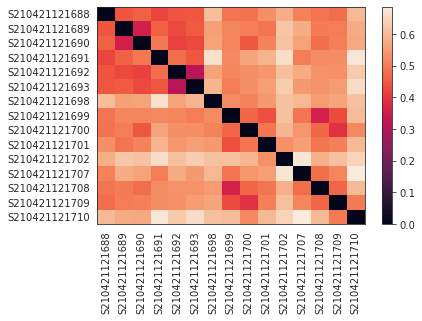

In [65]:
import skbio
fname = 'temp'
#results.unweighted_unifrac_pcoa_results.export_data(output_dir=os.path.join(beta_path, fname))
# results.unweighted_unifrac_distance_matrix.export_data(output_dir=os.path.join(beta_path, fname+'_matrix'))
results.unweighted_unifrac_distance_matrix.view(skbio.DistanceMatrix)

In [13]:
results_info = [("rarefied_table", "FeatureTable[Frequency]", "The resulting rarefied feature table."),
("faith_pd_vector", "SampleData[AlphaDiversity]", "Vector of Faith PD values by sample."),
("observed_features_vector", "SampleData[AlphaDiversity]", "Vector of Observed Features values by sample."),
("shannon_vector", "SampleData[AlphaDiversity]", "Vector of Shannon diversity values by sample."),
("evenness_vector", "SampleData[AlphaDiversity]", "Vector of Pielou's evenness values by sample."),
("unweighted_unifrac_distance_matrix", "DistanceMatrix", "Matrix of unweighted UniFrac distances between pairs of samples."),
("weighted_unifrac_distance_matrix", "DistanceMatrix", "Matrix of weighted UniFrac distances between pairs of samples."),
("jaccard_distance_matrix", "DistanceMatrix", "Matrix of Jaccard distances between pairs of samples."),
("bray_curtis_distance_matrix", "DistanceMatrix", "Matrix of Bray-Curtis distances between pairs of samples."),
("unweighted_unifrac_pcoa_results", "PCoAResults", "PCoA matrix computed from unweighted UniFrac distances between samples."),
("weighted_unifrac_pcoa_results", "PCoAResults", "PCoA matrix computed from weighted UniFrac distances between samples."),
("jaccard_pcoa_results", "PCoAResults", "PCoA matrix computed from Jaccard distances between samples."),
("bray_curtis_pcoa_results", "PCoAResults", "PCoA matrix computed from Bray-Curtis distances between samples."),
("unweighted_unifrac_emperor", "Visualization", "Emperor plot of the PCoA matrix computed from unweighted UniFrac."),
("weighted_unifrac_emperor", "Visualization", "Emperor plot of the PCoA matrix computed from weighted UniFrac."),
("jaccard_emperor", "Visualization", "Emperor plot of the PCoA matrix computed from Jaccard."),
("bray_curtis_emperor", "Visualization", "Emperor plot of the PCoA matrix computed from Bray-Curtis.")]

In [14]:
for i, info in enumerate(results_info):
    r_id, r_type, r_desc = info
    #print(i, r_id, r_type)
    file_name = f"{r_id}.qzv"
    if r_type == "FeatureTable[Frequency]":
        pass
    elif r_id.endswith('emperor'):
        print(i, r_id, r_type)
        print(f"--- {r_desc} ---")
        file_name = os.path.join(beta_path, file_name)
        print(f'Saving emperor file at: {file_name}\n')
        results[i].save(filepath=file_name)

13 unweighted_unifrac_emperor Visualization
--- Emperor plot of the PCoA matrix computed from unweighted UniFrac. ---
Saving emperor file at: /home/lauro/nupeb/rede-micro/redemicro-ana-flavia-nutri/experiments/ana-flavia-HSD-NCxHSD-NR-trim/qiime-artifacts/beta-analysis/unweighted_unifrac_emperor.qzv

14 weighted_unifrac_emperor Visualization
--- Emperor plot of the PCoA matrix computed from weighted UniFrac. ---
Saving emperor file at: /home/lauro/nupeb/rede-micro/redemicro-ana-flavia-nutri/experiments/ana-flavia-HSD-NCxHSD-NR-trim/qiime-artifacts/beta-analysis/weighted_unifrac_emperor.qzv

15 jaccard_emperor Visualization
--- Emperor plot of the PCoA matrix computed from Jaccard. ---
Saving emperor file at: /home/lauro/nupeb/rede-micro/redemicro-ana-flavia-nutri/experiments/ana-flavia-HSD-NCxHSD-NR-trim/qiime-artifacts/beta-analysis/jaccard_emperor.qzv

16 bray_curtis_emperor Visualization
--- Emperor plot of the PCoA matrix computed from Bray-Curtis. ---
Saving emperor file at: /home

In [15]:
for i, info in enumerate(results_info):
    r_id, r_type, r_desc = info
    if 'unifrac' in r_id:
        print(i, info)
# 9 10
results[5]

5 ('unweighted_unifrac_distance_matrix', 'DistanceMatrix', 'Matrix of unweighted UniFrac distances between pairs of samples.')
6 ('weighted_unifrac_distance_matrix', 'DistanceMatrix', 'Matrix of weighted UniFrac distances between pairs of samples.')
9 ('unweighted_unifrac_pcoa_results', 'PCoAResults', 'PCoA matrix computed from unweighted UniFrac distances between samples.')
10 ('weighted_unifrac_pcoa_results', 'PCoAResults', 'PCoA matrix computed from weighted UniFrac distances between samples.')
13 ('unweighted_unifrac_emperor', 'Visualization', 'Emperor plot of the PCoA matrix computed from unweighted UniFrac.')
14 ('weighted_unifrac_emperor', 'Visualization', 'Emperor plot of the PCoA matrix computed from weighted UniFrac.')


<artifact: DistanceMatrix uuid: 33fdc0fb-f8c6-47f1-8622-1d7b739cca4c>

### Alpha diversity correlation

This method only process `numeric` columns.


In [16]:
methods = ('spearman', 'pearson')
numerics_cols = metadata_qa.filter_columns(column_type='numeric')
if numerics_cols.column_count > 0:
    for metric, alpha_values in alpha_diversities.items():
        for method in methods:
            try:
                corr_view = alpha_correlation(alpha_diversity=alpha_values, metadata=numerics_cols, 
                                          method=method, intersect_ids=True).visualization
                view_path = os.path.join(alpha_path, f'alpha-correlation-{metric}-{method}.qzv')
                corr_view.save(view_path)
                corr_view
                print(f"DONE: Calculating alpha correlation: {metric} {method}")
            except Exception as e:
                print(f"ERROR: Calculating alpha correlation: {metric} {method}")

## Alpha diversity comparisons

Visually and statistically compare groups of alpha diversity values.

[diversity alpha_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-group-significance/)

In [17]:
for metric, alpha_values in alpha_diversities.items():
    print(f"Processing alpha_group_significance: {metric}")
    try:
        significance_view = alpha_group_significance(alpha_diversity=alpha_values, metadata=metadata_qa).visualization
        view_path = os.path.join(alpha_path, f'alpha-group-significance-{metric}.qzv')
        significance_view.save(view_path)
        significance_view
        print(f"DONE: Calculating alpha group significance: {metric}")
    except Exception as e:
        print(f"ERROR: Calculating alpha group significance: {metric}")

Processing alpha_group_significance: chao1
{'metadata': Metadata
--------
15 IDs x 3 columns
sample-name: ColumnProperties(type='categorical')
group-id:    ColumnProperties(type='categorical')
group-desc:  ColumnProperties(type='categorical')

Call to_dataframe() for a tabular representation., 'alpha_diversity': S210421121688    185.0
S210421121689    160.0
S210421121690    147.0
S210421121691    285.0
S210421121692    137.0
S210421121693    172.0
S210421121698     52.0
S210421121699    113.0
S210421121700     90.0
S210421121701     92.0
S210421121702     44.0
S210421121707    219.0
S210421121708    119.0
S210421121709    105.0
S210421121710     36.0
Name: chao1, dtype: float64}
DONE: Calculating alpha group significance: chao1
Processing alpha_group_significance: chao1_ci
ERROR: Calculating alpha group significance: chao1_ci
Processing alpha_group_significance: observed_features
{'metadata': Metadata
--------
15 IDs x 3 columns
sample-name: ColumnProperties(type='categorical')
group-i

## Beta diversity analysis

#### Reference
- [diversity beta](https://docs.qiime2.org/2022.8/plugins/available/diversity/beta/): Computes a user-specified beta diversity metric for all pairs of samples in a feature table.
- [Beta diversity metrics](http://scikit-bio.org/docs/0.2.0/generated/skbio.diversity.beta.html)

- Metric Choices('aitchison', 'braycurtis', 'canberra', 'canberra_adkins', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule')

In [18]:
metrics = ('aitchison', 'braycurtis', 'canberra', 'canberra_adkins', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule')
metrics = ('euclidean', 'dice', 'braycurtis', 'correlation', 'cosine', 'matching', 'jaccard')
beta_diversities = dict()
for metric in metrics:
    print(f"Calculating beta diversity: {metric}")
    try:
        beta_diversity = beta(table=tabs, metric=metric, n_jobs=6, pseudocount=1).distance_matrix
        beta_diversities[metric] = beta_diversity
        # Save SampleData[BetaDiversity] Artifact
        file_path = os.path.join(beta_path, f'beta-values-{metric}.qza')
        beta_diversity.save(file_path)
        print(f"DONE: Calculating beta diversity: {metric}")
    except Exception as e:
        print(f"ERROR: Calculating beta diversity: {metric}")

Calculating beta diversity: euclidean
{'metric': 'euclidean', 'pseudocount': 1, 'n_jobs': 6, 'table': <artifact: FeatureTable[Frequency] uuid: b440dafe-0be9-45f1-9070-2f52b52ec5eb>}
{'metric': 'euclidean', 'pseudocount': 1, 'n_jobs': 6, 'table': 909 x 15 <class 'biom.table.Table'> with 1956 nonzero entries (14% dense)}
{'metric': 'euclidean', 'pseudocount': 1, 'n_jobs': 6, 'table': 909 x 15 <class 'biom.table.Table'> with 1956 nonzero entries (14% dense)}
DONE: Calculating beta diversity: euclidean
Calculating beta diversity: dice
{'metric': 'dice', 'pseudocount': 1, 'n_jobs': 6, 'table': <artifact: FeatureTable[Frequency] uuid: b440dafe-0be9-45f1-9070-2f52b52ec5eb>}
{'metric': 'dice', 'pseudocount': 1, 'n_jobs': 6, 'table': 909 x 15 <class 'biom.table.Table'> with 1956 nonzero entries (14% dense)}
{'metric': 'dice', 'pseudocount': 1, 'n_jobs': 6, 'table': 909 x 15 <class 'biom.table.Table'> with 1956 nonzero entries (14% dense)}
DONE: Calculating beta diversity: dice
Calculating beta 

/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


ERROR: Calculating beta diversity: correlation
Calculating beta diversity: cosine
{'metric': 'cosine', 'pseudocount': 1, 'n_jobs': 6, 'table': <artifact: FeatureTable[Frequency] uuid: b440dafe-0be9-45f1-9070-2f52b52ec5eb>}
{'metric': 'cosine', 'pseudocount': 1, 'n_jobs': 6, 'table': 909 x 15 <class 'biom.table.Table'> with 1956 nonzero entries (14% dense)}
{'metric': 'cosine', 'pseudocount': 1, 'n_jobs': 6, 'table': 909 x 15 <class 'biom.table.Table'> with 1956 nonzero entries (14% dense)}
ERROR: Calculating beta diversity: cosine
Calculating beta diversity: matching
{'metric': 'matching', 'pseudocount': 1, 'n_jobs': 6, 'table': <artifact: FeatureTable[Frequency] uuid: b440dafe-0be9-45f1-9070-2f52b52ec5eb>}
{'metric': 'matching', 'pseudocount': 1, 'n_jobs': 6, 'table': 909 x 15 <class 'biom.table.Table'> with 1956 nonzero entries (14% dense)}
{'metric': 'matching', 'pseudocount': 1, 'n_jobs': 6, 'table': 909 x 15 <class 'biom.table.Table'> with 1956 nonzero entries (14% dense)}
DONE: C

/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


### Beta group significance

- [diversity beta_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/beta-group-significance/): Determine whether groups of samples are significantly different from one another using a permutation-based statistical test.
- Marti J Anderson. A new method for non-parametric multivariate analysis of variance. Austral ecology, 26(1):32–46, 2001. doi:https://doi.org/10.1111/j.1442-9993.2001.01070.pp.x.

In [19]:
methods = ('permanova', 'anosim', 'permdisp')
for method in methods:
    for metric, beta_diversity in beta_diversities.items():
        print(f'Calculating beta group significance with method {method} and metric {metric}')
        try:
            beta_view = beta_group_significance(distance_matrix=beta_diversity, 
                                                metadata=metadata_qa.get_column(class_col), 
                                                pairwise=True, method=method).visualization
            view_name = os.path.join(beta_path, f'beta-group-significance-{metric}-{method}.qzv')
            beta_view.save(view_name)
            print(f"DONE: Calculating beta group significance: {method} {metric}")
        except Exception as e:
            print(f"ERROR: Calculating beta group significance: {method} {metric}")

Calculating beta group significance with method permanova and metric euclidean
{'metadata': <CategoricalMetadataColumn name='group-id' id_count=15>, 'method': 'permanova', 'pairwise': True, 'permutations': 999, 'distance_matrix': <skbio.stats.distance._base.DistanceMatrix object at 0x7f7e6bcf2e50>}
DONE: Calculating beta group significance: permanova euclidean
Calculating beta group significance with method permanova and metric dice
{'metadata': <CategoricalMetadataColumn name='group-id' id_count=15>, 'method': 'permanova', 'pairwise': True, 'permutations': 999, 'distance_matrix': <skbio.stats.distance._base.DistanceMatrix object at 0x7f7e4b23fbb0>}
DONE: Calculating beta group significance: permanova dice
Calculating beta group significance with method permanova and metric braycurtis
{'metadata': <CategoricalMetadataColumn name='group-id' id_count=15>, 'method': 'permanova', 'pairwise': True, 'permutations': 999, 'distance_matrix': <skbio.stats.distance._base.DistanceMatrix object at 

<Figure size 432x288 with 0 Axes>

### Beta group Rarefaction

- [diversity beta_rarefaction](https://docs.qiime2.org/2022.8/plugins/available/diversity/beta-rarefaction/): Repeatedly rarefy a feature table to compare beta diversity results within a given rarefaction depth.  For a given beta diversity metric, this visualizer will provide: an Emperor jackknifed PCoA plot, samples clustered by UPGMA or neighbor joining with support calculation, and a heatmap showing the correlation between rarefaction trials of that beta diversity metric.